In [1]:
%matplotlib inline

In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
prng = np.random.RandomState(1234)

In [4]:
def objective(x, k):
    return (x - k)**2

## One wolf, C fixed, A Bernoulli

In [5]:
def one_step(x, f):
    A = prng.binomial(1, 0.5, size=x.shape) - 0.5
    x_new = x[0] - A*np.abs(x - x[0])
    best = np.argmin(f(x_new))
    x_new[[0, best]] = x_new[[best, 0]]  # put optimimum in position 0
    return x_new

In [6]:
def initial_conditions():
    return 50 * (prng.random(size=10) - 1)

In [7]:
from functools import partial

def experiment(k):
    x = initial_conditions()
    f = partial(objective, k=k)
    best = []
    for _ in range(100):
        x = one_step(x, f)
        best.append(x[0])
    return f(np.asarray(best))

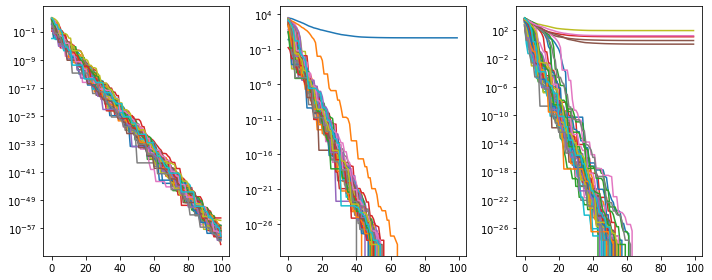

In [8]:
fig, (ax0, ax1, ax2) = plt.subplots(ncols=3, figsize=(10, 4))
for _ in range(50):
    ax0.semilogy(experiment(0))
    ax1.semilogy(experiment(20))
    ax2.semilogy(experiment(40))
fig.tight_layout()

## One wolf, C fixed, A uniform decreasing

In [9]:
def one_step(x, f, t):
    A = (2 - 2*t/100)*(2*prng.random(size=x.shape) - 1)
    x_new = x[0] - A*np.abs(x - x[0])
    best = np.argmin(f(x_new))
    x_new[[0, best]] = x_new[[best, 0]]  # put optimimum in position 0
    return x_new

In [10]:
def experiment(k):
    x = initial_conditions()
    f = partial(objective, k=k)
    best = []
    for t in range(101):
        x = one_step(x, f, t)
        best.append(x[0])
    return f(np.asarray(best))

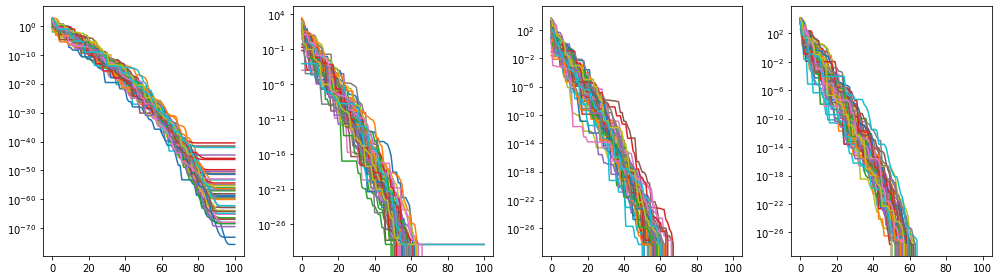

In [12]:
fig, (ax0, ax1, ax2, ax3) = plt.subplots(ncols=4, figsize=(14, 4))
for _ in range(50):
    ax0.semilogy(experiment(0))
    ax1.semilogy(experiment(20))
    ax2.semilogy(experiment(40))
    ax3.semilogy(experiment(100))
fig.tight_layout()

## One wolf, C uniform, A uniform decreasing

In [13]:
def one_step(x, f, t):
    A = (2 - 2*t/100)*(2*prng.random(size=x.shape) - 1)
    C = 2*prng.random(size=x.shape)
    x_new = x[0] - A*np.abs(x - C*x[0])
    best = np.argmin(f(x_new))
    x_new[[0, best]] = x_new[[best, 0]]  # put optimimum in position 0
    return x_new

In [14]:
def experiment(k):
    x = initial_conditions()
    f = partial(objective, k=k)
    best = []
    for t in range(101):
        x = one_step(x, f, t)
        best.append(x[0])
    return f(np.asarray(best))

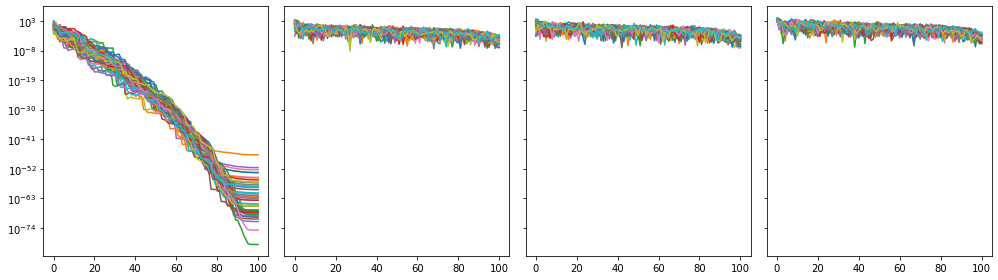

In [15]:
fig, (ax0, ax1, ax2, ax3) = plt.subplots(ncols=4, figsize=(14, 4), sharey=True)
for _ in range(50):
    ax0.semilogy(experiment(0))
    ax1.semilogy(experiment(20))
    ax2.semilogy(experiment(40))
    ax3.semilogy(experiment(100))
fig.tight_layout()

## Three wolves, C uniform, A uniform decreasing

In [16]:
def one_step(x, f, t):
    A1 = (2 - 2*t/100)*(2*prng.random(size=x.shape) - 1)
    A2 = (2 - 2*t/100)*(2*prng.random(size=x.shape) - 1)
    A3 = (2 - 2*t/100)*(2*prng.random(size=x.shape) - 1)

    C1 = 2*prng.random(size=x.shape)
    C2 = 2*prng.random(size=x.shape)
    C3 = 2*prng.random(size=x.shape)
    
    x1_new = x[0] - A1*np.abs(x - C1*x[0])
    x2_new = x[1] - A2*np.abs(x - C2*x[1])
    x3_new = x[2] - A3*np.abs(x - C3*x[2])
    x_new = (x1_new + x2_new + x3_new) / 3
    
    best = f(x_new)
    idx = np.argsort(best)
    return x_new[idx]

In [17]:
def experiment(k):
    x = initial_conditions()
    f = partial(objective, k=k)
    best = []
    for t in range(101):
        x = one_step(x, f, t)
        best.append(x[0])
    return f(np.asarray(best))

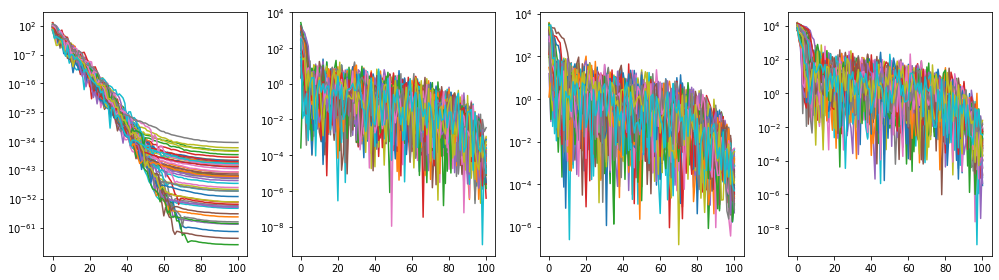

In [18]:
fig, (ax0, ax1, ax2, ax3) = plt.subplots(ncols=4, figsize=(14, 4))
for _ in range(50):
    ax0.semilogy(experiment(0))
    ax1.semilogy(experiment(20))
    ax2.semilogy(experiment(40))
    ax3.semilogy(experiment(100))
fig.tight_layout()

## Check with MEALPY

In [19]:
from mealpy.swarm_based import GWO

def forward(k):
    problem_dict = {
        "fit_func": partial(objective, k=k),
        "lb": [-100],
        "ub": [100],
        "minmax": "min",
        "log_to": None
    }
    model = GWO.OriginalGWO(epoch=100, pop_size=10)
    _, best_fitness = model.solve(problem_dict)
    return best_fitness

def experiment(k, n=200):
    return np.asarray([forward(k) for _ in range(n)])

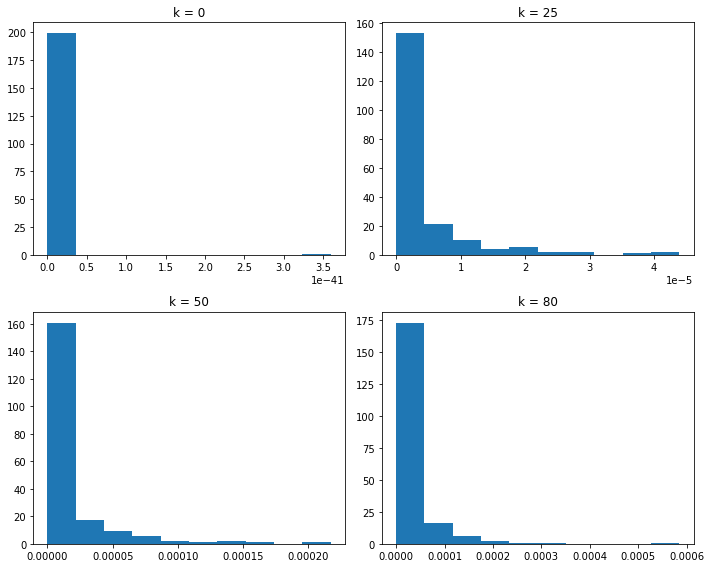

In [20]:
fig, axes = plt.subplots(ncols=2, nrows=2, figsize=(10, 8))
ax0, ax1, ax2, ax3 = axes.flatten()

ax0.hist(experiment(0))
ax0.set_title("k = 0")
ax1.hist(experiment(25))
ax1.set_title("k = 25")
ax2.hist(experiment(50))
ax2.set_title("k = 50")
ax3.hist(experiment(80))
ax3.set_title("k = 80")

fig.tight_layout()

## MEALPY in higher dimensions

In [21]:
def f(x, k):
    return np.sum((x-k)**2)

def forward(k):
    problem_dict = {
        "fit_func": partial(f, k=k),
        "lb": [-500] * 30,
        "ub": [500] * 30,
        "minmax": "min",
        "log_to": None
    }
    model = GWO.OriginalGWO(epoch=100, pop_size=10)
    _, best_fitness = model.solve(problem_dict)
    return best_fitness

def experiment(k, n=50):
    return np.asarray([forward(k) for _ in range(n)])

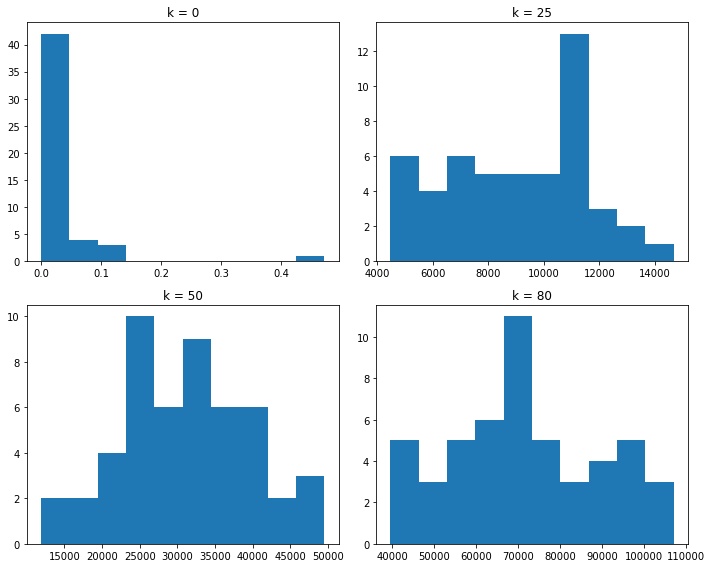

In [22]:
fig, axes = plt.subplots(ncols=2, nrows=2, figsize=(10, 8))
ax0, ax1, ax2, ax3 = axes.flatten()

ax0.hist(experiment(0))
ax0.set_title("k = 0")
ax1.hist(experiment(25))
ax1.set_title("k = 25")
ax2.hist(experiment(50))
ax2.set_title("k = 50")
ax3.hist(experiment(80))
ax3.set_title("k = 80")

fig.tight_layout()

In [23]:
ks = list(range(0, 100, 10))
avg_fitness = []
for k in ks:
    print(k)
    avg_fitness.append(np.mean(experiment(k)))

0
10
20
30
40
50
60
70
80
90


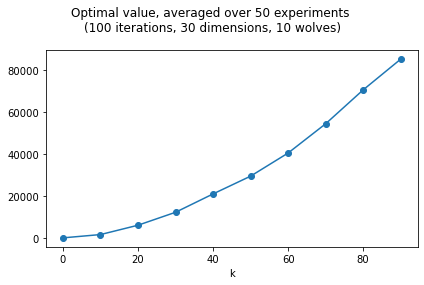

In [25]:
plt.plot(ks, avg_fitness, 'o-')
plt.xlabel("k")
plt.suptitle("Optimal value, averaged over 50 experiments \n(100 iterations, 30 dimensions, 10 wolves)")
plt.tight_layout()